In [14]:
import geopandas as gpd
import os
import pandas as pd
import matplotlib.pylab as plt
import shapely.speedups
import sqlite3
%config Completer.use_jedi = False #for auto complete code

In [2]:
file = 'D:/Proyectos_GitHub/umbrales_estaciones/data/Maestro/Maestro.xlsx'
df = pd.read_excel(file)

In [3]:
df

,INVENTARIO_SINCERADO,DZ,NOMBRE_ESTACION,CODIGO,CATEGORIA,CLASIFICACION,TIPO,COMUNICACION,FECHA_DE_INSTALACION,ESTADO_FUNCIONAMIENTO,ESTADO_OPERATIVIDAD,LATITUD,LONGITUD,Lat_Sexagesimal,Lot_Sexagesimal,ALTITUD,DEPARTAMENTO,PROVINCIA,DISTRITO
0,NO,1,ALAMOR,200322,CONVENCIONAL,HLM,HIDROLÓGICA,VOZ Y DATA,01/02/17,FUNCIONANDO,OPERATIVO,-4.474008,-80.399152,"-4°28'26.43""","-80°23'56.95""",127.0,PIURA,SULLANA,LANCONES
1,NO,1,ALAMOR,47E0D438,AUTOMATICA,EHA,HIDROLÓGICA,SATELITAL GOES,17/12/14,FUNCIONANDO,OPERATIVO,-4.477490,-80.397895,"-4°28'38.96""","-80°23'52.42""",116.0,PIURA,SULLANA,LANCONES
2,NO,1,BOCATOMA_CHIPILLICO,47E0E1A2,AUTOMATICA,EHA,HIDROLÓGICA,SATELITAL GOES,05/04/15,FUNCIONANDO,OPERATIVO,-4.714203,-80.118248,"-4°42'51.13""","-80°7'5.69""",340.0,PIURA,PIURA,LAS LOMAS
3,NO,1,BOCATOMA_ZAMBA,4723C424,AUTOMATICA,EHA,HIDROLÓGICA,SATELITAL GOES,13/05/14,FUNCIONANDO,OPERATIVO,-4.664442,-79.897353,"-4°39'51.99""","-79°53'50.47""",633.0,PIURA,AYABACA,PAIMAS
4,NO,1,CABO_INGA,47E01126,AUTOMATICA,EHA,HIDROLÓGICA,SATELITAL GOES,05/12/14,FUNCIONANDO,OPERATIVO,-3.978733,-80.399381,"-3°58'43.44""","-80°23'57.77""",160.0,TUMBES,TUMBES,SAN JACINTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,NO,13,PUENTE_ISLA_CABANILLAS,210406,CONVENCIONAL,HLM,HIDROLÓGICA,VOZ Y DATA,16/07/94,FUNCIONANDO,OPERATIVO,-15.471833,-70.224020,"-15°28'18.6""","-70°13'26.47""",3838.0,PUNO,SAN ROMAN,JULIACA
251,NO,13,PUENTE_LOROCO_CALLACAME,210502,CONVENCIONAL,HLG,HIDROLÓGICA,VOZ Y DATA,09/07/94,FUNCIONANDO,OPERATIVO,-16.570650,-69.322780,"-16°34'14.34""","-69°19'22.01""",3862.0,PUNO,CHUCUITO,KELLUYO
252,NO,13,PUENTE_RAMIS,210101,CONVENCIONAL,HLG,HIDROLÓGICA,VOZ Y DATA,01/01/56,FUNCIONANDO,OPERATIVO,-15.255309,-69.873786,"-15°15'19.11""","-69°52'25.63""",3825.0,PUNO,HUANCANE,TARACO
253,NO,13,PUENTE_ZAPATILLA,270503,CONVENCIONAL,HLM,HIDROLÓGICA,VOZ Y DATA,01/01/76,FUNCIONANDO,OPERATIVO,-16.138603,-69.578730,"-16°8'18.97""","-69°34'43.43""",3846.0,PUNO,EL COLLAO,ILAVE


In [4]:
points_gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.LONGITUD,df.LATITUD),crs='EPSG:4326')

C:\Users\jose\anaconda3\envs\work_env\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


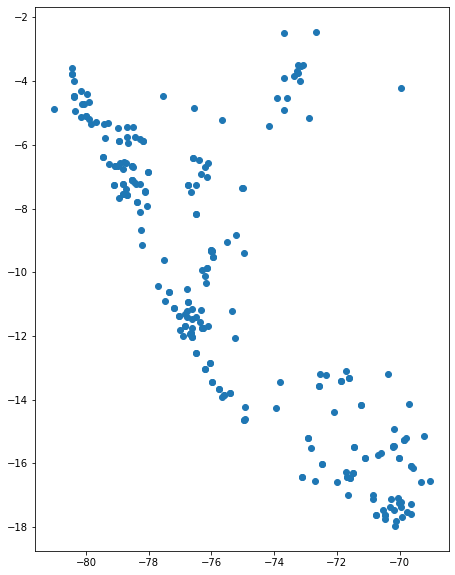

In [5]:
points_gdf.plot(figsize=(15,10))
plt.show()

In [6]:
clima =gpd.read_file('../data/shp/clasif_clima_peru/clasif_clima_1981_2010.shp')

In [7]:
clima['CODIGO']

0          D (i) B'
1          C (i) B'
2          B (r) B'
3          C (r) B'
4          B (r) C'
5          C (r) A'
6          B (r) A'
7      B (o , i) B'
8      B (o , i) C'
9      C (o , i) B'
10         B (r) D'
11         D (i) A'
12         C (i) A'
13     C (i , p) A'
14         B (i) C'
15         A (r) B'
16     C (o , i) C'
17         A (r) C'
18         A (r) D'
19         C (i) C'
20         B (i) D'
21     B (o , i) D'
22         B (i) E'
23     C (o , i) D'
24         C (i) D'
25         C (i) E'
26     C (o , i) E'
27     C (i , p) B'
28         D (i) C'
29         D (i) D'
30         B (i) B'
31         E (d) B'
32         E (d) A'
33     D (i , p) A'
34     D (i , p) B'
35     D (i , p) C'
36         A (r) A'
37      Lago JunÃ­n
38    Lago Titicaca
39          Glaciar
40             Loma
Name: CODIGO, dtype: object

In [8]:
shapely.speedups.enable() 
# enable shapely.speedups which makes queries running faster.
sub_df=[]
for i in range(clima.shape[0]):
    
    pip_mask = points_gdf.within(clima.loc[i, 'geometry']) 
    # selecting the polygon's geometry field to filter out points that 
    # are not overlaid
    pip_data = df.loc[pip_mask]
    
    pip_data['COD_Clima']= clima.CODIGO[i]
    
    sub_df.append(pip_data)
    
maestro = pd.concat((sub_df))

C:\Users\jose\anaconda3\envs\work_env\lib\site-packages\shapely\speedups\__init__.py:50: RuntimeWarning: shapely.speedups not available
  warnings.warn("shapely.speedups not available", RuntimeWarning)
C:\Users\jose\AppData\Local\Temp\ipykernel_14976\2335432169.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pip_data['COD_Clima']= clima.CODIGO[i]


In [11]:
df = pd.concat((sub_df))

In [12]:
df

,INVENTARIO_SINCERADO,DZ,NOMBRE_ESTACION,CODIGO,CATEGORIA,CLASIFICACION,TIPO,COMUNICACION,FECHA_DE_INSTALACION,ESTADO_FUNCIONAMIENTO,...,LATITUD,LONGITUD,Lat_Sexagesimal,Lot_Sexagesimal,ALTITUD,DEPARTAMENTO,PROVINCIA,DISTRITO,geometry,COD_Clima
51,NO,3,EL_TAMBO,211003,CONVENCIONAL,HLM,HIDROLÓGICA,SIN_DATO,2022-04-08 00:00:00,FUNCIONANDO,...,-7.573976,-78.706554,"-7°34'26.31""","-78°42'23.59""",688.0,LA LIBERTAD,GRAN CHIMÚ,MARMOT,POINT (-78.70655 -7.57398),D (i) B'
52,NO,3,EL_TAMBO,47E0A2A8,AUTOMATICA,EHMA,HIDROMETEOROLÓGICA,SATELITAL GOES,06/02/15,FUNCIONANDO,...,-7.573976,-78.706554,"-7°34'26.31""","-78°42'23.59""",688.0,LA LIBERTAD,GRAN CHIMÚ,MARMOT,POINT (-78.70655 -7.57398),D (i) B'
60,NO,3,PUENTE_COINA,211004,CONVENCIONAL,HLM,HIDROLÓGICA,SIN_DATO,SIN_DATO,FUNCIONANDO,...,-7.796364,-78.380122,"-7°47'46.91""","-78°22'48.44""",1823.0,LA LIBERTAD,OTUZCO,USQUIL,POINT (-78.38012 -7.79636),D (i) B'
61,NO,3,PUENTE_COINA,472E74CC,AUTOMATICA,EHMA,HIDROMETEOROLÓGICA,SATELITAL GOES,SIN_DATO,FUNCIONANDO,...,-7.796364,-78.380122,"-7°47'46.91""","-78°22'48.44""",1823.0,LA LIBERTAD,OTUZCO,USQUIL,POINT (-78.38012 -7.79636),D (i) B'
63,NO,3,PUENTE_PALMIRA,211002,CONVENCIONAL,HLM,HIDROLÓGICA,SIN_DATO,SIN_DATO,FUNCIONANDO,...,-7.549189,-78.810514,"-7°32'57.08""","-78°48'37.85""",647.0,LA LIBERTAD,GRAN CHIMÚ,CASCAS,POINT (-78.81051 -7.54919),D (i) B'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,NO,10,PUENTE_PEREZ,230001,CONVENCIONAL,HLM,HIDROLÓGICA,PLANILLA,01/11/17,FUNCIONANDO,...,-9.346940,-75.982500,"-9°20'48.98""","-75°58'57""",675.0,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAÚN,POINT (-75.98250 -9.34694),A (r) A'
213,NO,10,PUENTE_TOCACHE,230700,CONVENCIONAL,HLG,HIDROLÓGICA,VOZ Y DATA,01/01/03,FUNCIONANDO,...,-8.184750,-76.507890,"-8°11'5.1""","-76°30'28.4""",483.0,SAN MARTIN,TOCACHE,TOCACHE,POINT (-76.50789 -8.18475),A (r) A'
218,NO,10,TINGO_MARIA,47270400,AUTOMATICA,EHMA,HIDROMETEOROLÓGICA,SATELITAL GOES,31/12/00,FUNCIONANDO,...,-9.296010,-76.002070,"-9°17'45.64""","-76°0'7.45""",646.0,HUANUCO,LEONCIO PRADO,RUPA-RUPA,POINT (-76.00207 -9.29601),A (r) A'
219,NO,10,TINGO_MARIA,221820,CONVENCIONAL,HLM,HIDROLÓGICA,VOZ Y DATA,22/09/97,PARALIZADA,...,-9.296010,-76.002070,"-9°17'45.64""","-76°0'7.45""",646.0,HUANUCO,LEONCIO PRADO,RUPA-RUPA,POINT (-76.00207 -9.29601),A (r) A'


In [26]:
conn = sqlite3.connect('../data/DZ/niveles.db')
df.drop(['geometry'],axis=1).to_sql(name = 'Maestro',con=conn, if_exists='replace',index=False)
conn.commit()

In [25]:
conn.close()